# Distributing Data with Statistics

In [77]:
# finding mean (average) 
mean = lambda l: sum(l) / len(l)

In [79]:
assert mean([i for i in range(10)]) == 4.5, 'Invalid mean'

In [80]:
# To find the median, we sort the numbers in ascending order. 
# If the length of the list of numbers is odd, 
# the number in the middle of the list is the median. 
# If the length of the list of numbers is even, 
# we get the median by taking the mean of the two middle numbers.
def median(numbers):
    numbers.sort()
    length = len(numbers)
    mid = length // 2
    return (numbers[mid] 
            if length % 2 == 1 
            else mean(numbers[mid - 1 : mid + 1]))

In [83]:
data = [4, 1, 3, 6, 10]

assert median(data) == 4, "Failed odd number of mean test"

data.append(15)
assert median(data) == 5, "Failed even number of mean test"

data = [4, 1]
assert median(data) == 2.5

data = [5]
assert median(data) == 5

In [101]:
# finding the most common elements (mode)
from collections import Counter

mode = lambda n: Counter(n).most_common()[0][0]

In [111]:
data = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
assert mode(data) == 9

In [120]:
'''
Calculating the mode when the list of numbers may
have multiple modes
'''
from collections import Counter

def multiple_mode(data):
    counter = Counter(data).most_common()
    max_num = counter[0][1]
    modes = []
    for num in counter:
        if num[1] == max_num:
            modes.append(num[0])
        else:
            break
    return modes
        

In [123]:
data = [5, 5, 5, 4, 4, 4, 9, 1, 3]
assert multiple_mode(data) == [5, 4]

In [125]:
'''
Frequency table for a list of numbers
Sorted by the numbers
'''
from collections import Counter

def frequency_table(numbers):
    table = Counter(numbers)
    numbers_freq = table.most_common()
    numbers_freq.sort()
    return numbers_freq

In [131]:
scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]

numbers_freq = frequency_table(scores)

print('Number\tFrequency')
for number in numbers_freq:
    print(f'{number[0]:6}\t{number[1]:9}')

Number	Frequency
     1	        2
     2	        1
     4	        1
     5	        2
     6	        3
     7	        2
     8	        2
     9	        5
    10	        2


In [132]:
'''
Find the variance of a list of numbers.

The variance measures how far each number in the set is from the mean. 
Variance is calculated by taking the differences between each number
in the set and the mean, squaring the differences 
(to make them positive) and dividing the sum of the squares 
by the number of values in the set.

'''

def calculate_variance(numbers):
    # find the mean
    avg = mean(numbers)
    # find the difference of each number from the mean
    squared_diff = ((n - avg)**2 for n in numbers)
    return sum(squared_diff)/len(numbers)

In [143]:
donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
variance = calculate_variance(donations)
std = variance**0.5
print(f'The variance of the list of numbers is {variance:.10}')
print(f'The standard deviation of the list of numbers is {std:.7}')

The variance of the list of numbers is 141047.3542
The standard deviation of the list of numbers is 375.5627


In [152]:
'''
Find correlation between two sets of data
'''

def find_correlation(x, y):
    n = len(x)
    xy = [n_x * n_y for n_x, n_y in zip(x, y)]
    sum_x_sq = sum(n_x**2 for n_x in x)
    sum_y_sq = sum(y_x**2 for y_x in y)
    numerator = n * sum(xy) - sum(x) * sum(y)
    denominator_term1 = (n * sum(n_x**2 for n_x in x) - (sum(x))**2)
    denominator_term2 = (n * sum(n_y**2 for n_y in y) - (sum(y))**2)
    denominator = (denominator_term1 * denominator_term2)**0.5   
    return numerator / denominator
    

In [156]:
high_school_grades = [90, 92, 95, 96, 87, 87, 90, 95, 98, 96]
collage_admission_test_scores = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]
correlation = find_correlation(high_school_grades, collage_admission_test_scores)
print(f'Hight scool grades and collage admission test scores correlation {correlation:.2}')

Hight scool grades and collage admission test scores correlation 0.32


In [157]:
high_school_math_grades = [83, 85, 84, 96, 94, 86, 87, 97, 97, 85]
collage_admission_test_scores = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]
correlation = find_correlation(high_school_math_grades, collage_admission_test_scores)
print(f'Hight scool math grades and collage admission test scores correlation {correlation:.2}')

Hight scool math grades and collage admission test scores correlation 1.0


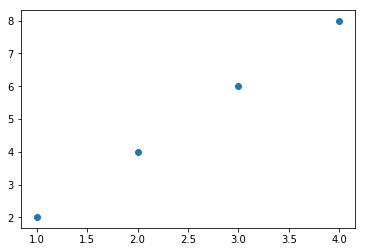

In [161]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

plt.scatter(x, y)
plt.show()

In [170]:
import csv
import matplotlib.pyplot as plt

def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.xlabel('python')
    plt.ylabel('pretty print')
    plt.show()
    
def read_csv(filename):
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        
        python = []
        highest_correlated = []
        for row in reader:
            python.append(float(row[1]))
            highest_correlated.append(float(row[2]))
            
    return python, highest_correlated

Highest correlation: 0.9251


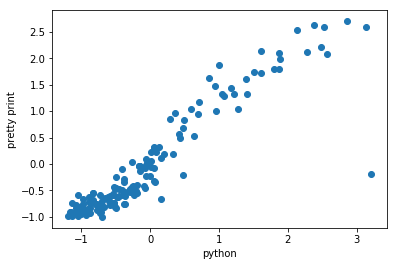

In [171]:
python, highest_correlated = read_csv('correlate-python.csv')
corr = find_correlation(python, highest_correlated)
print(f'Highest correlation: {corr:.4}')
scatter_plot(python, highest_correlated)